# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report


# **2. Data Understanding**

## Load Dataset

In [2]:
heart_disease = pd.read_csv("heart.csv")
heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Informasi Dataset

In [3]:
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Berdasarkan informasi dataset tersebut dapat diketahui bahwa:
- Jumlah data: 918 entri  
- Jumlah fitur: 12 kolom  
- Tidak ada missing values  
- Fitur terdiri dari:
  - Numerik: `Age`, `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR`, `Oldpeak`
  - Kategorikal: `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`
  - Target: `HeartDisease` (0 = Tidak, 1 = Iya)

In [4]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
rest_bp = (heart_disease.RestingBP == 0).sum()
chol = (heart_disease.Cholesterol == 0).sum()
 
print("Nilai 0 di kolom RestingBP ada: ", rest_bp)
print("Nilai 0 di kolom Cholesterol ada: ", chol)


Nilai 0 di kolom RestingBP ada:  1
Nilai 0 di kolom Cholesterol ada:  172


In [6]:
heart_disease.loc[(heart_disease['Cholesterol']==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [7]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
heart_disease = heart_disease.loc[(heart_disease[['RestingBP','Cholesterol']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
heart_disease.shape


(746, 12)

<Axes: xlabel='Oldpeak'>

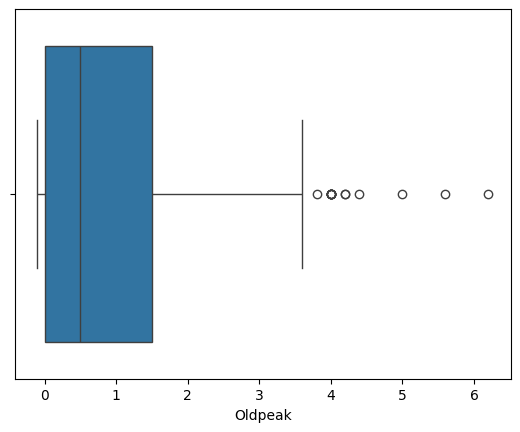

In [8]:
sns.boxplot(x=heart_disease['Oldpeak'])

In [9]:
# Ambil hanya kolom numerikal
numeric_cols = heart_disease.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = heart_disease[numeric_cols].quantile(0.25)
Q3 = heart_disease[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((heart_disease[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (heart_disease[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
heart_disease = heart_disease[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
heart_disease.shape

(580, 12)

# **3.Exploratory Data Analysis**

## Cek Distribusi Target

C:\Users\SKRT\AppData\Local\Temp\ipykernel_4216\4084088482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=heart_disease, palette='Set2')


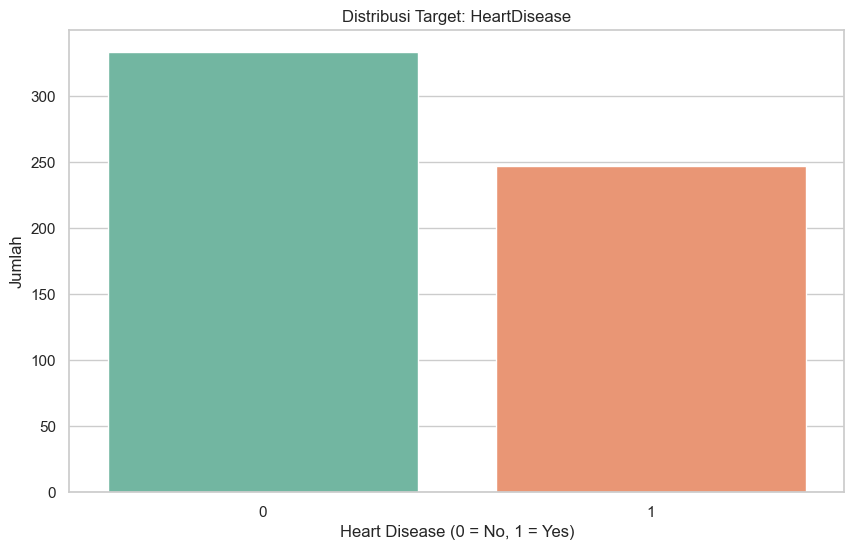

In [10]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

sns.countplot(x='HeartDisease', data=heart_disease, palette='Set2')
plt.title('Distribusi Target: HeartDisease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan hasil visualisasi tersebut menunjukkan distribusi data target HeartDisease, dimana:
- 0 mewakili tidak memiliki penyakit jantung (No) dengan jumlah 330+ data artinya sekitar 57% data.
- 1 Mewakili penyakit Jantung (Yes) dengan 240+ data artinya sekitar 43% data.
- Distribusi kelas tidak seimbang sempurna tetapi masih wajar karena selisih antara keduanya tidak terlalu besar, artinya dataset masih cukup seimbang untuk digunakan dalam model klasifikasi tanpa perlu penanganan khusus terhadap imbalance(seperti undersampling atau undersampling)

## Distribusi Usia Pasien

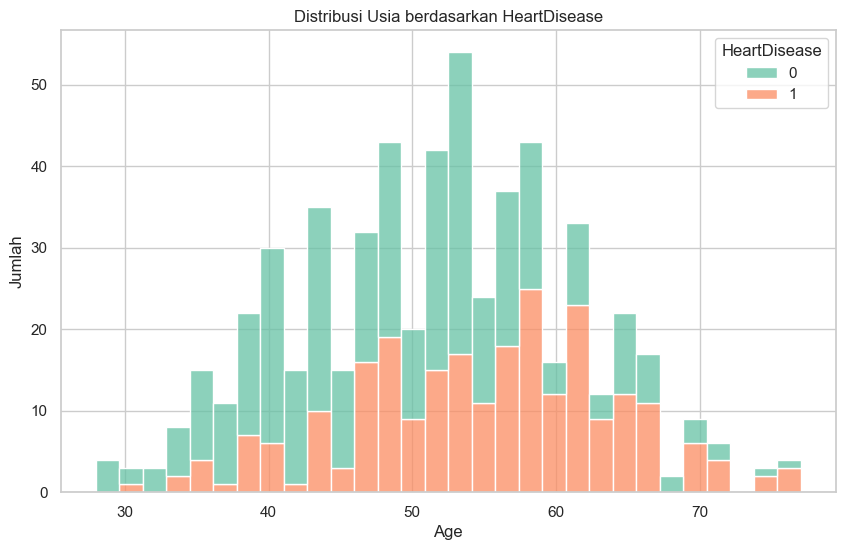

In [11]:
sns.histplot(data=heart_disease, x='Age', hue='HeartDisease', multiple='stack', bins=30, palette='Set2')
plt.title('Distribusi Usia berdasarkan HeartDisease')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.show()

- Kasus penyakit jantung paling banyak terjadi pada usia **50–65 tahun**.
- Usia muda (<40) memiliki kemungkinan lebih rendah mengalami penyakit jantung.

## Distribusi Jenis Kelamin dan HeartDisease

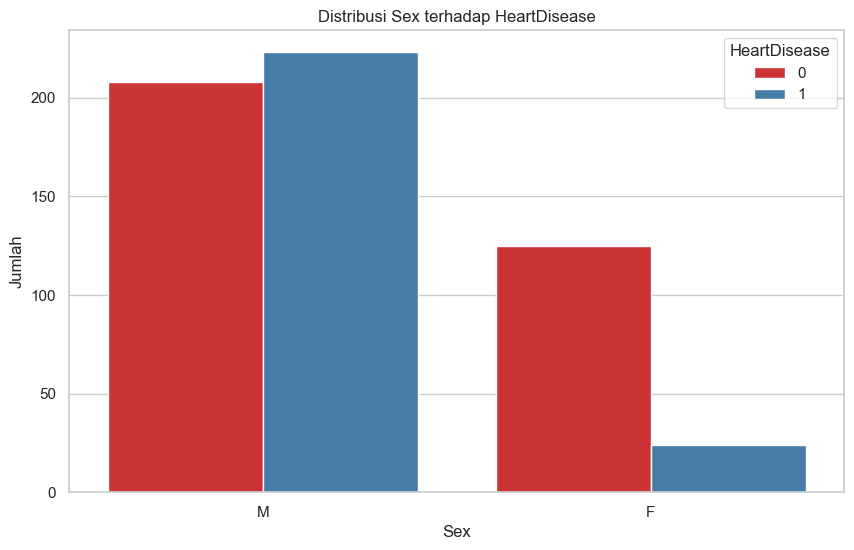

In [12]:
sns.countplot(x='Sex', hue='HeartDisease', data=heart_disease, palette='Set1')
plt.title('Distribusi Sex terhadap HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan hasil visualisasi ini menunjukkan distribusi jenis kelamin terhadap HeartDisease. Berikaut hasil visualisasi:
- Laki-laki mendominasi kasus penyakit HeartDisease.
- Perempuan Cenderung tidak mengalami HeartDisease.
- Ketimpangan Distribusi Jenis Kelamin, sehingga berpotensi menunjukkan bias gender dalam pengumpulan data atau memang secara klinis lebih banyak pria yang mengalami HeartDisease dalam sampel ini. 

## ChestPainType terhadap HeartDisease

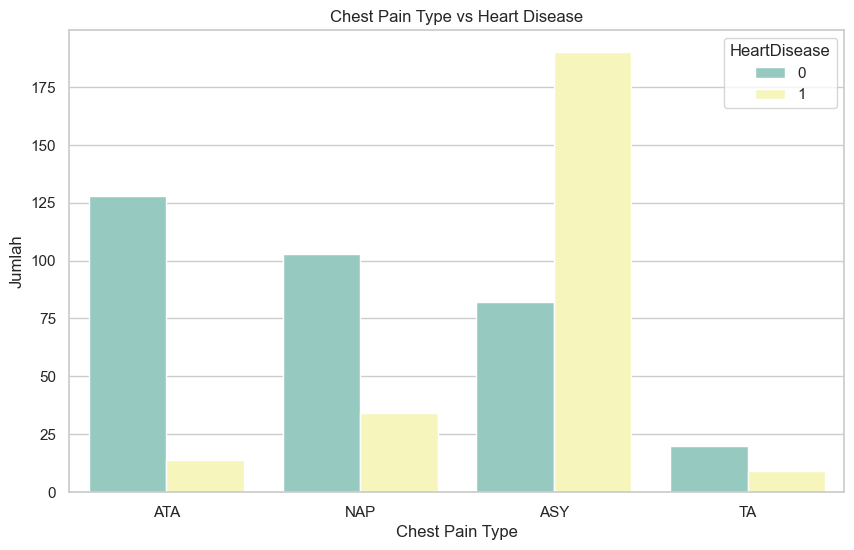

In [13]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=heart_disease, palette='Set3')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan visualisasi yang menunjukkan hubungan antara ChestPainType dan HeartDisease diketahui bahwa:
- ASY sangat mendominasi kasus HeartDisease, hal ini menunjukkan bahwa pasien yang memiliki penyakit jantung tidak merasakan nyeri dada, atau tidak menunjukkan gejala khas.
- ATA dan NAP lebih banyak muncul pada pasien tanpa HeartDisease, artinya jenis nyeri dada ini lebihs ering bukan disebabkan oleh HeartDisease dalam dataset ini.
- TA cukup jarang muncul pada semua kategori, baik penderita maupun non penderita HeartDisease, jumlah kategori TA tergolong rendah.


## Korelasi antar fitur numerik

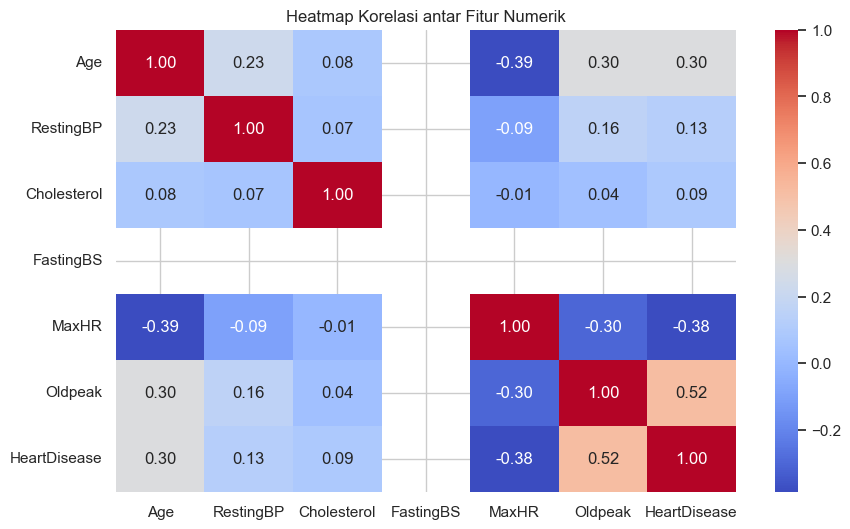

In [14]:
numeric_features = heart_disease.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(heart_disease[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.show()

Berdasarkan visualiasi heatmap antara korelasi antar fitur numerik terhadap target HertDisease dapat diketahui bahwa: 
- Oldpeak (r=0.52) merupakan korelasi postif paling kuat, dimana makin tinggi nilai Depresi ST setelah olahraga, makin besar kemungkinan seseorang mengalami penyakit jantung.
- MaxHR (r=-0.38) yang merupakan korelasi negatif, dimana semakin tinggi denyut jantung maksimum saat olahraga, kemungkinan penyakit jantung cenderung menurun. Hal ini menunjukkan bahwa kemampuan jantung merespons stres fisik lebih baik pada orang sehat.
- Age (r=30) yang merupakan korelasi positif yang dimana usia lebih tua sedikit berkolerasi dengan peningkatan risiko penyakit jantung.
- RestingBP, Cholesterol, dan FastingBS memiliki kkorelasi yang lemah (<0.15) terhadap penyakit jantung, yang berarti meskipun ini faktor yang relevan, kontribusinya tidak signifikan secara linier terhadap target.

# **4. Data Preaparation**

## Cek Duplikasi Data

In [15]:
print("Jumlah baris sebelum:", heart_disease.shape[0])
print("Jumlah duplikat:", heart_disease.duplicated().sum())
heart_disease = heart_disease.drop_duplicates()
print("Jumlah baris setelah menghapus duplikat:", heart_disease.shape[0])

Jumlah baris sebelum: 580
Jumlah duplikat: 0
Jumlah baris setelah menghapus duplikat: 580


Pemeriksaan data menunjukkan bahwa tidak terdapat baris duplikat dalam dataset. Ini menunjukkan bahwa data sudah bersih dan siap digunakan untuk tahap analisis atau pemodelan tanpa perlu pembersihan lebih lanjut terkait duplikasi.

## Cek Missing Values

In [16]:
print(heart_disease.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Berdasarkan hasil pengecekan, tidak ditemukan nilai yang hilang (missing values) dalam dataset. Oleh karena itu, tidak diperlukan langkah tambahan untuk imputasi atau penghapusan data. Dataset siap digunakan untuk tahap analisis atau pemodelan lebih lanjut.

## Encoding Kategorikal fitur

### Informasi Dataset

In [17]:
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             580 non-null    int64  
 1   Sex             580 non-null    object 
 2   ChestPainType   580 non-null    object 
 3   RestingBP       580 non-null    int64  
 4   Cholesterol     580 non-null    int64  
 5   FastingBS       580 non-null    int64  
 6   RestingECG      580 non-null    object 
 7   MaxHR           580 non-null    int64  
 8   ExerciseAngina  580 non-null    object 
 9   Oldpeak         580 non-null    float64
 10  ST_Slope        580 non-null    object 
 11  HeartDisease    580 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 58.9+ KB
None


Berdasarkan informasi tersebut diketahui bahwa terdapat 5 kolom kategorikal dalam dataset ini, yaitu kolom :
- Sex
- ChestPainType
- RestingECG
- ExerciseAngina
- ST_Slope

### Melakukan Encoding fitur Kategorikal

In [18]:
label = LabelEncoder()
heart_disease['Sex'] = label.fit_transform(heart_disease['Sex'])
heart_disease['ExerciseAngina'] = label.fit_transform(heart_disease['ExerciseAngina'])

heart_disease = pd.get_dummies(heart_disease, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

Label encoder digunakan untuk fitur Jenis Kelamin dan Exercise Angina karena kedua fitur tersebut hanya memiliki dua nilai kategorikal yaitu M/F dan Y/N, sehingga bisa diubah menjadi angka 0 dan1 menggunakan label encoder.
Untuk fitur kategorikal dengan lebih dari dua kategori, digunakan One-Hot Encoding dengan pd.get_dummies.

In [19]:
heart_disease.sample(10)
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                580 non-null    int64  
 1   Sex                580 non-null    int32  
 2   RestingBP          580 non-null    int64  
 3   Cholesterol        580 non-null    int64  
 4   FastingBS          580 non-null    int64  
 5   MaxHR              580 non-null    int64  
 6   ExerciseAngina     580 non-null    int32  
 7   Oldpeak            580 non-null    float64
 8   HeartDisease       580 non-null    int64  
 9   ChestPainType_ATA  580 non-null    bool   
 10  ChestPainType_NAP  580 non-null    bool   
 11  ChestPainType_TA   580 non-null    bool   
 12  RestingECG_Normal  580 non-null    bool   
 13  RestingECG_ST      580 non-null    bool   
 14  ST_Slope_Flat      580 non-null    bool   
 15  ST_Slope_Up        580 non-null    bool   
dtypes: bool(7), float64(1), int32(2

Seluruh fitur kategorikal telah dikonversi ke dalam bentuk numerik. Fitur biner seperti Sex dan ExerciseAngina diubah menggunakan Label Encoding, sedangkan fitur dengan lebih dari dua kategori seperti ChestPainType, RestingECG, dan ST_Slope diubah menggunakan One-Hot Encoding. Proses ini penting untuk memastikan bahwa model dapat memproses data dengan benar.

### Feature Scaling

In [20]:
scaler = StandardScaler()
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
heart_disease[num_cols] = scaler.fit_transform(heart_disease[num_cols])

heart_disease.sample(10)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
72,0.031701,1,-0.675395,-1.180254,0,0.336476,0,-0.830365,1,False,False,False,True,False,True,False
211,-0.177239,0,0.641120,1.035177,0,-0.076203,1,-0.830365,1,False,True,False,True,False,True,False
7,0.240642,1,-1.333652,-0.636847,0,0.006332,0,-0.830365,0,True,False,False,True,False,False,True
533,1.180874,1,-1.333652,0.282767,0,-0.076203,1,1.250031,1,False,False,False,False,True,True,False
560,0.240642,1,0.180340,-0.741348,0,-0.200007,0,-0.622325,0,False,True,False,False,True,False,True
748,1.285344,1,-0.675395,0.157365,0,-1.891991,1,1.458071,1,False,False,False,False,False,False,False
894,0.658523,0,-0.017137,-0.866750,0,-0.447615,0,-0.206246,0,False,False,False,True,False,True,False
890,1.285344,1,2.615891,-0.239741,0,0.542815,0,-0.206246,0,False,False,True,False,False,True,False
626,0.136172,1,0.772771,-0.260641,0,-1.272973,1,-0.830365,0,False,False,False,False,False,False,True
96,-0.908531,1,0.772771,-0.657747,0,-0.158739,0,-0.830365,0,True,False,False,True,False,False,True


Proses Feature Scaling dilakukan menggunakan metode StandardScaler untuk fitur numerik seperti Age, RestingBP, Cholesterol, MaxHR, dan Oldpeak. Tujuan scaling ini adalah untuk memastikan semua fitur memiliki skala yang seragam sehingga model machine learning dapat belajar secara optimal dan tidak bias terhadap fitur tertentu yang memiliki rentang nilai besar.

### Data Splitting

In [21]:
X = heart_disease.drop(columns=[heart_disease.columns[-1]])
y = heart_disease[heart_disease.columns[-1]] 

# Split dataset menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset setelah splitting
print("Ukuran data latih:", X_train.shape, y_train.shape)
print("Ukuran data uji:", X_test.shape, y_test.shape)

Ukuran data latih: (464, 15) (464,)
Ukuran data uji: (116, 15) (116,)


In [22]:
print("Distribusi kelas:", np.bincount(y_train))

Distribusi kelas: [222 242]


Dataset dibagi menjadi 80% data latih (464 baris) dan 20% data uji (116 baris) menggunakan fungsi train_test_split. Pembagian ini bertujuan untuk melatih model machine learning dan mengevaluasi performanya secara objektif pada data yang belum pernah dilihat oleh model. Proses ini sangat penting untuk menghindari overfitting dan memastikan model dapat melakukan generalisasi dengan baik.

# **5. Modelling**

## K-Nearest Neighbours

In [23]:
# Inisialisasi model KNN (misal, k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model pada data latih
knn.fit(X_train, y_train)

# Memprediksi data uji
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
roc_knn = roc_auc_score(y_test, y_proba_knn)

K-Nearest Neighbors (KNN) adalah algoritma pembelajaran berbasis instance yang digunakan untuk klasifikasi dan regresi. KNN bekerja dengan mencari K tetangga terdekat dari sebuah data berdasarkan metrik jarak (seperti Euclidean atau Manhattan). Kelebihan KNN adalah sederhana dan mudah diimplementasikan, tetapi kelemahannya adalah tidak efisien untuk dataset besar karena harus menghitung jarak untuk setiap instance

## Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Memprediksi data uji
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]


# Mengevaluasi performa model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
roc_dt = roc_auc_score(y_test, y_proba_dt)


Menggunakan algoritma Decision Tree untuk mengklasifikasikan data dan mengevaluasi performanya menggunakan metrik klasifikasi.

## Logistic Regression

In [25]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Mengevaluasi performa model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
roc_logreg = roc_auc_score(y_test, y_proba_logreg)


Menggunakan model Logistic Regression untuk mengklasifikasikan data target secara biner, serta mengevaluasi performanya menggunakan metrik klasifikasi

## Random Forest

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
roc_rf = roc_auc_score(y_test, y_proba_rf)

Menggunakan algoritma Random Forest untuk melakukan klasifikasi dan mengevaluasi performanya. Random Forest adalah metode ensemble learning yang membangun beberapa pohon keputusan (decision trees) dan menggabungkannya untuk hasil prediksi yang lebih akurat dan stabil.

# **4. Evaluasi Model**

## KNearest Neighbours

In [27]:
# Menampilkan dalam DataFrame
metrics_knn = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC Score"],
    "Score": [accuracy, precision, recall, f1, roc_knn]
})

metrics_knn

,Matriks,Score
0,Accuracy,0.922414
1,Precision,0.923615
2,Recall,0.922414
3,F1-Score,0.922396
4,ROC AUC Score,0.978591


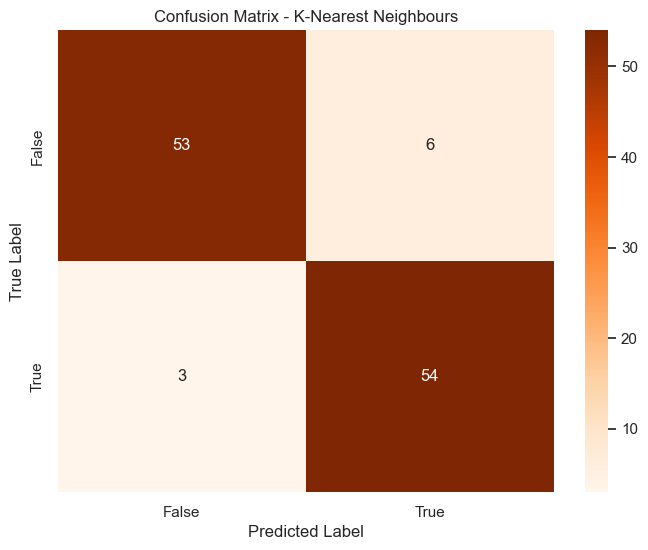

In [28]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.show()

## Decision Tree

In [29]:
# Menampilkan dalam DataFrame
metrics_dt = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC Score"],
    "Score": [accuracy_dt, precision_dt, recall_dt, f1_dt, roc_dt]
})

metrics_dt

,Matriks,Score
0,Accuracy,0.965517
1,Precision,0.966091
2,Recall,0.965517
3,F1-Score,0.965517
4,ROC AUC Score,0.965804


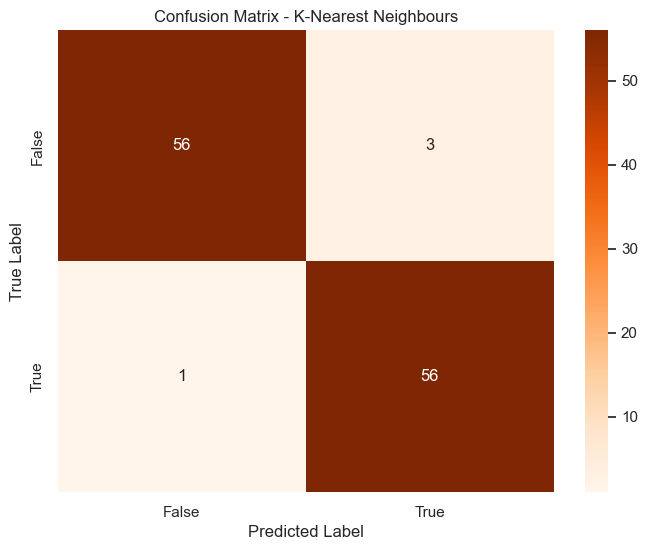

In [30]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.show()

## Logistic Regression

In [31]:
# Menampilkan dalam DataFrame
metrics_logreg = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC Score"],
    "Score": [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_logreg]
})

metrics_logreg

,Matriks,Score
0,Accuracy,0.982759
1,Precision,0.983343
2,Recall,0.982759
3,F1-Score,0.982759
4,ROC AUC Score,0.984240


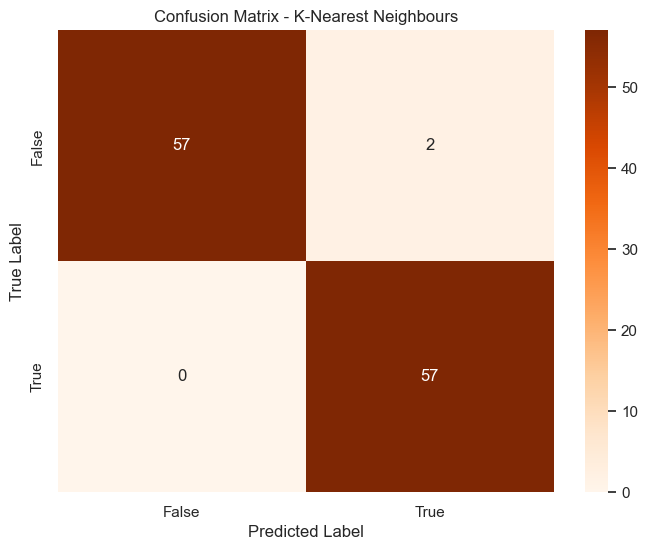

In [32]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.show()

## Random Forest

In [33]:
# Menampilkan dalam DataFrame
metrics_rf = pd.DataFrame({
    "Matriks": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"],
    "Score": [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_rf]
})

metrics_rf

,Matriks,Score
0,Accuracy,0.991379
1,Precision,0.991528
2,Recall,0.991379
3,F1-Score,0.991380
4,ROC AUC,0.986916


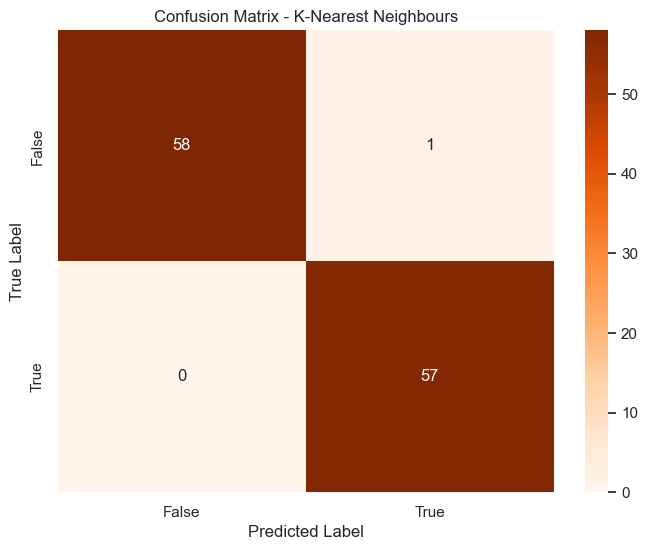

In [34]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - K-Nearest Neighbours")
plt.show()

Empat algoritma yang digunakan dalam proyek ini adalah K-Nearest Neighbors(KNN), Decision Tree, Logistic Regression, dan Random Forest. Berikut adalah hasil metrik evaluasi dari empat algoritma klasifikasi yang telah dilatih:

| Model                         | Accuracy | Precision | Recall | F1-Score | ROC AUC |
| ----------------------------- | -------- | --------- | ------ | -------- |---------|
| **K-Nearest Neighbors (KNN)** | 0.92     | 0.92      | 0.92   | 0.92     | 0.98    |
| **Decision Tree**             | 0.96     | 0.96      | 0.96   | 0.96     | 0.96    |
| **Logistic Regression**       | 0.98     | 0.98      | 0.98   | 0.98     | 0.98    |
| **Random Forest**             | 0.99     | 0.99      | 0.99   | 0.99     | 0.99    |

Berdasarkan hasil evaluasi, **Random Forest** memberikan nilai tertinggi dalam metrik evaluasi utama, yang menunjukkan bahwa model ini memiliki performa paling stabil dan mampu mengklasifikasikan data dengan akurat. Logistic Regression juga memberikan hasil yang baik, terutama pada ROC AUC, dan memiliki keunggulan dalam hal interperabilitas. Decision Tree memiliki performa yang cukup baik, namun rentan terhadap overfitting. Sementara itu, model KNN menunjukkan performa yang cukup, tetapi dapat terpengaruh oleh distribusi dan skala data.

Berdasarkan hasil tersebut, **Random Forest** dipilih sebagai model terbaik karena mampu memberikan hasil evaluasi tertinggi dalam metrik yang paling penting untuk kaus ini, yaitu F1-Score dan ROC AUC. Selain itu, Random Forest memiliki keunggulan dalam menangani fitur yang kompleks dan memberikan generalisasi yang baik terhadap data baru. Model ini menjadi solusi akhir yang digunakan dalam proyek klasifikasi 